**Dataset link**: https://www.kaggle.com/datasets/mexwell/us-software-engineer-jobs

In [1]:
import pandas as pd
from bokeh.plotting import figure, show
import matplotlib.pyplot as plt
import plotly.graph_objects as go

### Data Preparation

In [5]:
# data = pd.read_csv('data/us-software-engineer-jobs-zenrows.csv')

In [9]:
# data.head()

,title,company,salary,rating,review_count,types,location,relative_time,hires_needed,hires_needed_exact,...,indeed_applyable,ad_id,remote_location,source_id,hiring_event_job,indeed_apply_enabled,job_location_postal,company_overview_link,activity_date,location_extras
0,Android Developer,Shockoe,NaN,0.0,0,Full-time,"Richmond, VA",30+ days ago,NaN,NaN,...,False,NaN,False,11706594,False,False,NaN,NaN,NaN,NaN
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",0.0,0,Full-time,"Louisville, KY",30+ days ago,ONE,1,...,True,370154371.0,False,11468052,False,True,40219.0,NaN,Active 2 days ago,NaN
2,Sr. Android Developer,The Cervantes Group,NaN,4.1,22,Full-time,Remote,6 days ago,TWO_FOUR,2,...,True,NaN,False,9570478,False,True,NaN,/cmp/The-Cervantes-Group,Active 3 days ago,NaN
3,Junior Software Engineer,Medical Knowledge Group,NaN,0.0,0,Full-time,Remote,8 days ago,ONE,1,...,True,368864426.0,False,501562,False,True,NaN,NaN,Active 3 days ago,NaN
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,4.1,548,Full-time,"Kansas City, MO",2 days ago,NaN,NaN,...,False,NaN,False,1439,False,False,NaN,/cmp/Federal-Reserve-Bank-of-New-York,NaN,NaN


In [10]:
# print(data.columns)

Index(['title', 'company', 'salary', 'rating', 'review_count', 'types',
       'location', 'relative_time', 'hires_needed', 'hires_needed_exact',
       'urgently_hiring', 'remote_work_model', 'snippet', 'dradis_job', 'link',
       'new_job', 'job_link', 'sponsored', 'featured_employer',
       'indeed_applyable', 'ad_id', 'remote_location', 'source_id',
       'hiring_event_job', 'indeed_apply_enabled', 'job_location_postal',
       'company_overview_link', 'activity_date', 'location_extras'],
      dtype='object')


In [11]:
# data = data[['title', 'company', 'salary',  'types', 'location', 'relative_time', 'remote_location']]

In [13]:
# data.head()

,title,company,salary,types,location,relative_time,remote_location
0,Android Developer,Shockoe,NaN,Full-time,"Richmond, VA",30+ days ago,False
1,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",Full-time,"Louisville, KY",30+ days ago,False
2,Sr. Android Developer,The Cervantes Group,NaN,Full-time,Remote,6 days ago,False
3,Junior Software Engineer,Medical Knowledge Group,NaN,Full-time,Remote,8 days ago,False
4,"Cloud Engineer (Software Engineer Advanced, Ex...",Federal Reserve Bank of New York,NaN,Full-time,"Kansas City, MO",2 days ago,False


In [25]:
# nan = data[data.isna().any(axis=1)]
# len(nan)

42070

In [26]:
# len(data['salary']) - len(nan)

16363

### Create 2 new csvs, one without NaN values at all and one with filled NaN values

In [28]:
# data = data.dropna()

In [29]:
# data.shape

(16363, 7)

In [31]:
# data.to_csv('data/us-software-engineer-jobs-zenrows (no NaN).csv')

## Exploratory Data Analysis
### Questiones to be answered

1. **Job Title Analysis:**
   - What are the most common job titles in software engineering roles?
   - How do job titles vary by locatin
   - Most popular jobs by location?y?

2. **Salary Analysis:**
   - What is the distribution of salaries across different software engineering rract)?
   - Are there salary differences based on loptions?

3. **Company Analysis:**
   - Which companies are posting the most software engineerinilar roles?
   - What are the top companies offering remot?

4. **Job Type Analysis:**
   - What is the distribution of job types (e.g., full-time, part-time, contract)?
   - How does the job type influence rysalary or location?

5. **Location Analysis:**
   - What are the most common locations for software engineering roles?
   - How does the location impact salary?
   - Which locations offer the most remotfe6ent 6imes of the year?

7. **Remote Work Analysis:**
   - What proportion of job ads offer remote work options?
   - How do remote job opportunities vary by location or company?
   - Is there a salary difference between 7emor8 interact with each other?

9. **Job Market Trends:**
   - What are the emerging trends in software engineering roles based on job titles, locations, and remote work?
   - Are there any significant changes in demand for certain skills or job types?


In [2]:
cleaned_jobs_df = pd.read_csv('data/us-software-engineer-jobs-zenrows (no NaN).csv')

In [3]:
filled_nan_jobs_df = pd.read_csv('data/us-software-engineer-jobs-zenrows (filled NaN).csv')

In [37]:
dataset = pd.read_csv('data/us-software-engineer-jobs-zenrows (average_salary).csv')

In [20]:
# cleaned_jobs_df.pop('Unnamed: 0')

0            1
1            7
2           14
3           17
4           19
         ...  
16358    58417
16359    58420
16360    58423
16361    58424
16362    58425
Name: Unnamed: 0, Length: 16363, dtype: int64

In [38]:
dataset.head(5)

,Unnamed: 0,title,company,salary,types,location,relative_time,remote_location,average salary
0,0,Web Developer,"Denios, Inc.","$45,000 - $55,000 a year",Full-time,"Louisville, KY",30+ days ago,False,50000.0
1,1,"Real-Time, Embedded Software Engineer",Checkmate Partners,"$100,000 - $200,000 a year",Full-time,"San Francisco Bay Area, CA",5 days ago,False,150000.0
2,2,Cyber Security Operation Center Manager (SOC),Goliath Solutions Group,$15 - $20 an hour,Full-time,"Fairview, TX",27 days ago,False,17.5
3,3,DevOps Engineer - Very Profitable Start-up,TechTalent NW,"$125,000 - $170,000 a year",Full-time,"Bellevue, WA",1 day ago,False,147500.0
4,4,Lead Software/Java Engineer,Bectran,"$90,000 - $130,000 a year",Full-time,"Chicago, IL",7 days ago,False,110000.0


In [39]:
dataset.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
16358    16358
16359    16359
16360    16360
16361    16361
16362    16362
Name: Unnamed: 0, Length: 16363, dtype: int64

In [ ]:
[salary_hour for salary_hour in cleaned_jobs_df['salary'] if 'hour' in salary_hour]

In [ ]:
[salary_year for salary_year in cleaned_jobs_df['salary'] if 'year' in salary_year]

## **Job Title Analysis:**
   - What are the most common job titles in software engineering roles?
   - How do job titles vary by location or company?

In [40]:
# list of job titles
titles = [title for title in dataset['title'].unique()]
len(titles) # 2883

2883

In [43]:
common_titles = dataset['title'].value_counts().head(5)
common_titles

title
Senior Software Engineer    1106
Software Engineer           1095
Sr. Software Engineer        292
Software Developer           275
Full Stack Developer         201
Name: count, dtype: int64

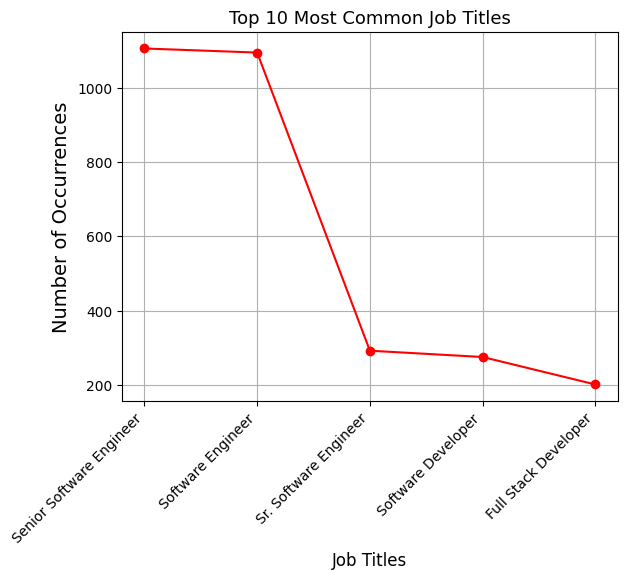

In [44]:
# Plotting the line chart
# plt.figure(figsize=(10, 6))
plt.plot(common_titles.index, common_titles.values, marker='o', linestyle='-', color='r')

# Adding titles and labels
plt.title('Top 10 Most Common Job Titles', fontsize=13)
plt.xlabel('Job Titles', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

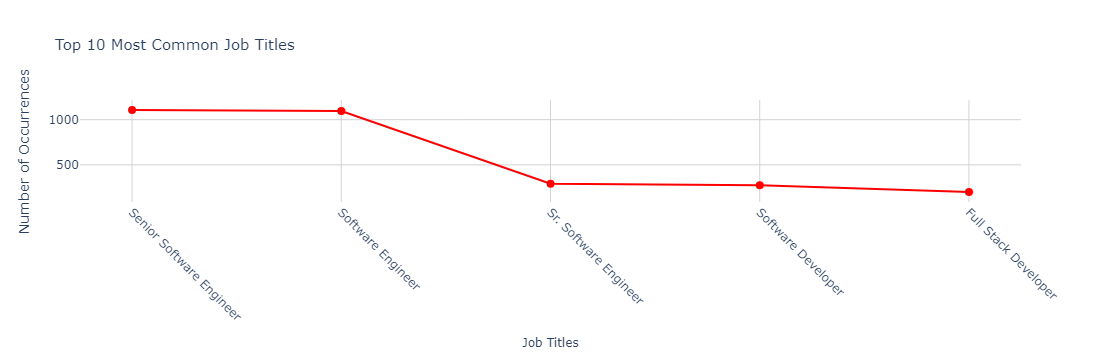

In [45]:
import plotly.graph_objects as go

fig = go.Figure()

# Plotting the line chart
fig.add_trace(go.Scatter(
    x=common_titles.index,
    y=common_titles.values,
    mode='lines+markers',
    line=dict(color='red'),
    marker=dict(color='red', size=8),
))

# Adding titles and labels
fig.update_layout(
    title='Top 10 Most Common Job Titles',
    xaxis_title='Job Titles',
    yaxis_title='Number of Occurrences',
    title_font_size=15,
    xaxis=dict(tickangle=45),
    yaxis=dict(titlefont=dict(size=14)),
    xaxis_title_font=dict(size=12),
    showlegend=False,
    plot_bgcolor='white',
    xaxis_tickmode='array',
    xaxis_tickvals=common_titles.index,
)

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()

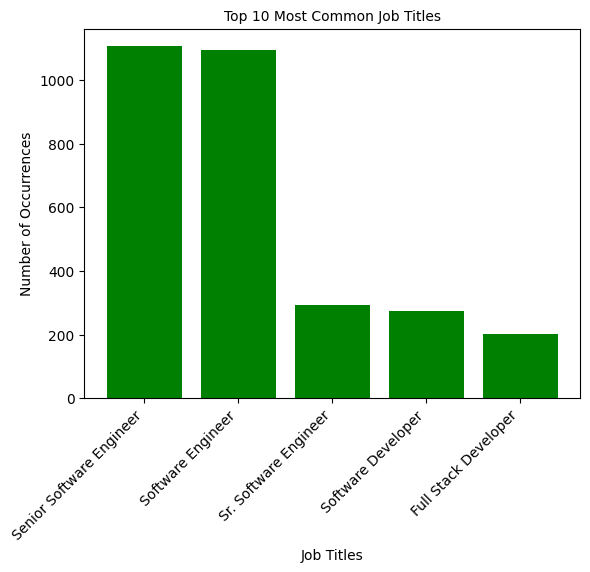

In [46]:
# plt.figure(figsize=(10, 6))
plt.bar(common_titles.index, common_titles.values, color='g')
plt.title('Top 10 Most Common Job Titles', fontsize=10)
plt.xlabel('Job Titles', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.show()

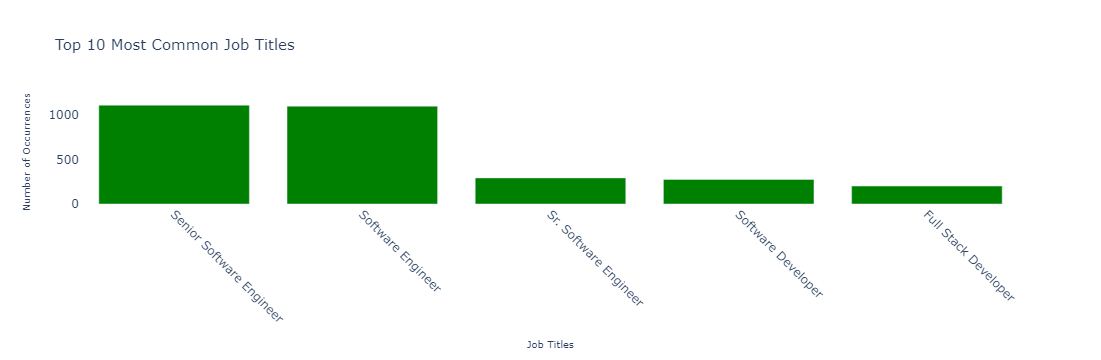

In [47]:
import plotly.graph_objects as go

# Assuming common_titles is a pandas Series with the job titles as the index and their occurrences as the values

fig = go.Figure()

# Plotting the bar chart
fig.add_trace(go.Bar(
    x=common_titles.index,
    y=common_titles.values,
    marker_color='green',
))

# Adding titles and labels
fig.update_layout(
    title='Top 10 Most Common Job Titles',
    xaxis_title='Job Titles',
    yaxis_title='Number of Occurrences',
    title_font_size=15,
    xaxis=dict(tickangle=45),
    yaxis=dict(titlefont=dict(size=10)),
    xaxis_title_font=dict(size=10),
    plot_bgcolor='white',
    showlegend=False
)

fig.show()


**5 Most Common Job Titles**
- Senior Software Engineer
- Software Engineer
- Software Developer
- Full Stack Developer


### How do job titles vary by location?

In [10]:
location = [location for location in cleaned_jobs_df['location'].unique()]
location

['Louisville, KY',
 'San Francisco Bay Area, CA',
 'Fairview, TX',
 'Bellevue, WA',
 'Chicago, IL',
 'Miami Lakes, FL',
 'San Jose, CA',
 'Denver, CO',
 'Nashville, TN',
 'Remote',
 'Albany, NY',
 'Clarksburg, MD',
 'Atlanta, GA',
 'Tampa, FL',
 'Austin, TX',
 'Sandy, UT',
 'California',
 'Fort Atkinson, WI',
 'Texas',
 'Lorain, OH',
 'Helena, MT',
 'West Chester, PA',
 'Portland, OR',
 'Dallas, TX',
 'Seattle, WA',
 'New York, NY',
 'Chadds Ford, PA',
 'Boston, MA',
 'Lindon, UT',
 'Bethesda, MD',
 'San Francisco, CA',
 'Kanawha County, WV',
 'Bloomfield, CT',
 'Washington, DC',
 'Milwaukee, WI',
 'Los Angeles, CA',
 'Frederick, MD',
 'Ankeny, IA',
 'Newton, MA',
 'Corvallis, OR',
 'Mounds View, MN',
 'United States',
 'Johns Creek, GA',
 'State College, PA',
 'Little Rock, AR',
 'Mountain View, CA',
 'Palm City, FL',
 'Philadelphia, PA',
 'Woodland, CA',
 'Burlington, VT',
 'Reston, VA',
 'Greenwood Village, CO',
 'Everett, WA',
 'Chantilly, VA',
 'Barrington, IL',
 'York, PA',
 'Tex

In [11]:
company = [company for company in cleaned_jobs_df['company'].unique()]
company

['Denios, Inc.',
 'Checkmate Partners',
 'Goliath Solutions Group',
 'TechTalent NW',
 'Bectran',
 'College Auto Sales of Florida',
 'Salesforce',
 'Project Admission',
 'Indeed',
 'Clipcentric Inc.',
 'Robotic Research LLC',
 'Resource Management Associates LLC.',
 'Defy Medical',
 'infolob',
 'POPi/o Mobile Video Cloud',
 'CQENS Technologies Inc.',
 'Real Time Automation',
 'Absolute Machine Tools, Inc.',
 'Socket Mobile, Inc.',
 'Apto Payments',
 'CyberCoders',
 'Wisely Inc',
 'State of Montana',
 'IT Giants Inc',
 'Flux Resources',
 'Systems Automated',
 'PLLT VIRTUAL CONSULTANTS',
 'DataAxxis',
 'FreeRateUpdate.com LLC',
 'Thumbraise',
 'Decide',
 'HK Tech',
 'SPN Solutions Inc.',
 'SkyWalkGlobalServices',
 'State of West Virginia',
 'Ampcus Tech Pvt Ltd',
 'BOTG LLC',
 'CorTech',
 'TELUS International Inc.',
 'KTL Solutions, Inc',
 'Prime Trust, LLC',
 'Topaz Labs',
 'Cellencor, Inc.',
 'Skyward Federal LLC',
 'Axis Technology, LLC',
 'Glympse Bio',
 'Active911',
 'MultiTech',
 '

In [57]:
location_title_counts = dataset.groupby(['location', 'title']).size().reset_index(name='count')
location_title_counts

most_popular_jobs = location_title_counts.loc[location_title_counts.groupby('location')['count'].idxmax()]

sorted_most_popular_jobs = most_popular_jobs.sort_values(by='count', ascending=False).head(5)

sorted_most_popular_jobs

,location,title,count
3518,Remote,Senior Software Engineer,271
369,"Austin, TX",Software Engineer,87
4266,"Seattle, WA",Software Engineer,79
896,"Chicago, IL",Senior Software Engineer,66
2487,"New York, NY",Senior Software Engineer,53


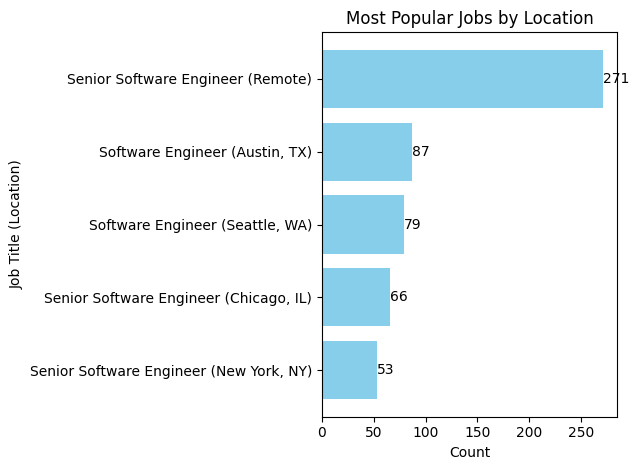

In [58]:
# Plotting
# plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_most_popular_jobs['title'] + ' (' + sorted_most_popular_jobs['location'] + ')', 
                sorted_most_popular_jobs['count'], 
                color='skyblue')

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Job Title (Location)')
plt.title('Most Popular Jobs by Location')
plt.gca().invert_yaxis()  # To display the highest counts at the top

# Adding value labels on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, 
             f'{int(width)}', 
             va='center')

plt.tight_layout()
plt.show()


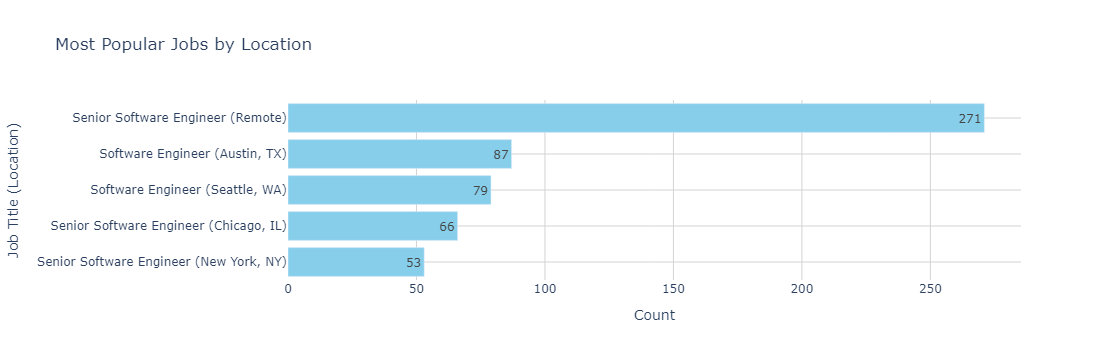

In [98]:
import plotly.graph_objects as go

# Assuming sorted_most_popular_jobs is a DataFrame with 'title', 'location', and 'count' columns

# Create job title with location
job_titles = sorted_most_popular_jobs['title'] + ' (' + sorted_most_popular_jobs['location'] + ')'

# Create the figure
fig = go.Figure()

# Plotting the horizontal bar chart
fig.add_trace(go.Bar(
    y=job_titles,
    x=sorted_most_popular_jobs['count'],
    orientation='h',
    marker_color='skyblue',
))

# Inverting y-axis to display the highest counts at the top
fig.update_layout(
    title='Most Popular Jobs by Location',
    xaxis_title='Count',
    yaxis_title='Job Title (Location)',
    yaxis=dict(autorange="reversed"),
    plot_bgcolor='white',
    showlegend=False,
)

# Adding value labels on the bars
fig.update_traces(text=sorted_most_popular_jobs['count'], textposition='auto')

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

# Show the plot
fig.show()


## **Locations with the most listings**

- Remote
- Austin, TX
- Seattle, WA
- 
New York, NY        5- 
San Francisco, CA

## What is the distribution of salaries across different software engineering roles?

In [ ]:
salaries = [salary for salary in dataset['average salary'].unique()]
sorted(salaries)

In [187]:
salaries_by_role = dataset.groupby(['average salary', 'title']).size().reset_index(name='frequency')
salaries_by_role

salaries_by_role_sorted = salaries_by_role.sort_values(by='average salary', ascending=False)
salaries_by_role_sorted.head(10)

filtered_salaries_by_role = salaries_by_role_sorted[salaries_by_role_sorted['frequency'] >= 5]
filtered_salaries_by_role.head(10)

,average salary,title,frequency
4315,289200.0,Senior Engineer II - Nordstrom Fraud Technology,23
4309,254000.0,Principal Software Engineer,25
4308,254000.0,Principal Engineer - Enterprise Platform,5
4297,220000.0,Staff Software Engineer - Conversations Platfo...,42
4296,220000.0,Staff Site Reliability Engineer - Enterprise,5
4295,220000.0,Software Engineer,8
4294,216027.5,Director of SW Engineering for Speech Startup,13
4291,215000.0,Reverse Software Engineer,27
4290,211380.5,Sr Prinicpal Software Engineer,20
4278,201500.0,Software Engineer,25


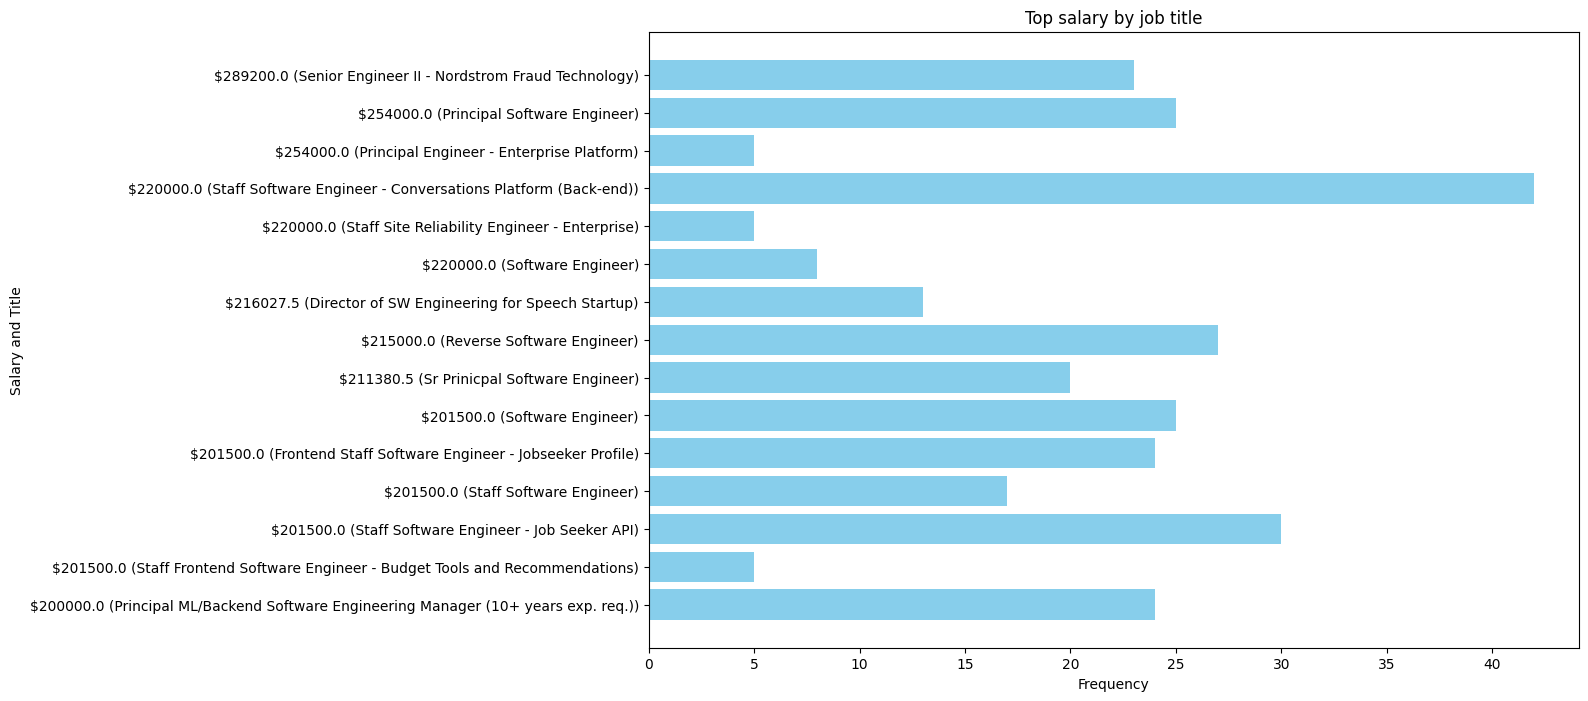

In [189]:
# Plot the top 10 salary ranges by frequency
top_salaries_by_role = filtered_salaries_by_role.head(15)

plt.figure(figsize=(12, 8))
plt.barh('$' + top_salaries_by_role['average salary'].astype(str) + ' (' + top_salaries_by_role['title'] + ')', 
         top_salaries_by_role['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Salary and Title')
plt.title('Top salary by job title')
plt.gca().invert_yaxis()  # Highest frequencies on top
plt.show()

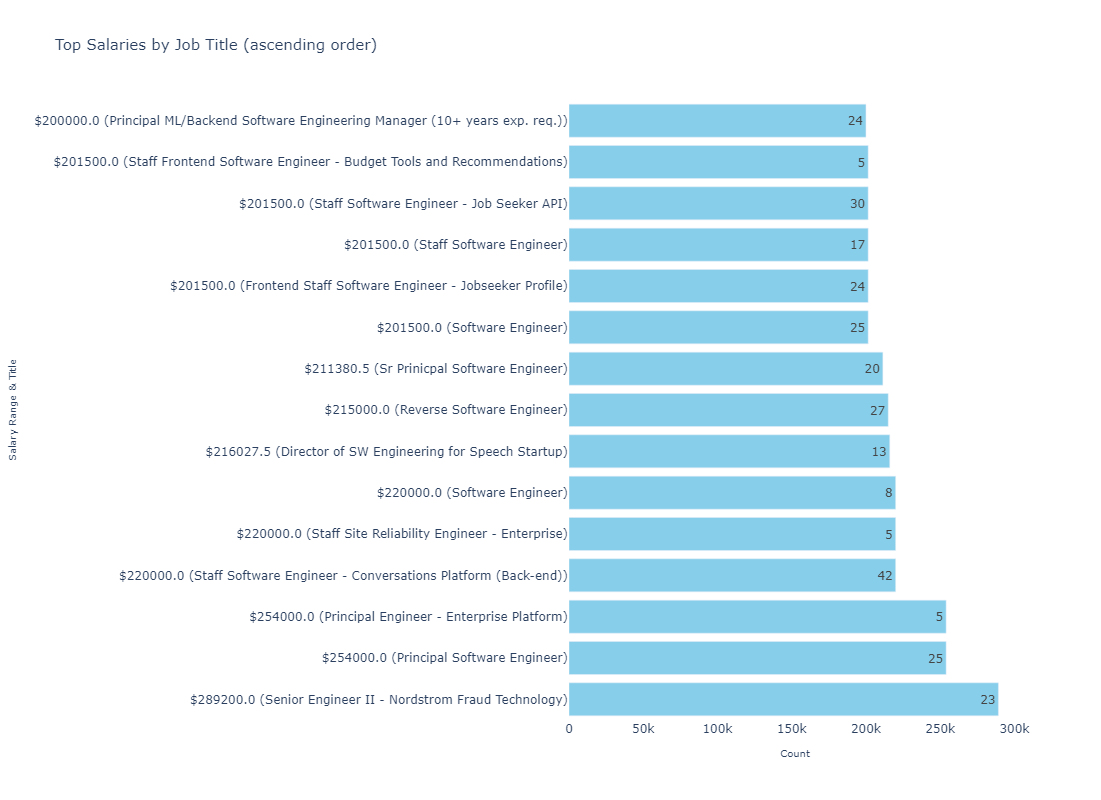

In [205]:
import plotly.graph_objects as go

fig = go.Figure()

top_salaries_by_role = filtered_salaries_by_role.head(15)

fig.add_trace(go.Bar(
    x=top_salaries_by_role['average salary'],
    y='$' + top_salaries_by_role['average salary'].astype(str) + ' (' + top_salaries_by_role['title'] + ')',
    orientation='h',
    marker_color='skyblue',
    text=top_salaries_by_role['frequency'],  # Adding text labels
    textposition='auto'
))

# Inverting y-axis to display the highest counts at the top
fig.update_layout(
    title='Top Salaries by Job Title (ascending order)',
    xaxis_title='Count',
    yaxis_title='Salary Range & Title',
    plot_bgcolor='white',
    showlegend=False,
    title_font_size=15,
    xaxis_title_font=dict(size=10),
    yaxis_title_font=dict(size=10),
    height=800,  # Increasing the figure height
    margin=dict(l=300)  # Increasing the left margin
)

# Show the plot
fig.show()


## Salary by location

In [197]:
salaries_by_location = dataset.groupby(['average salary', 'location']).size().reset_index(name='frequency')
salaries_by_location

salaries_by_location_sorted = salaries_by_location.sort_values(by='average salary', ascending=False)
salaries_by_location_sorted.head(10)

filtered_salaries = salaries_by_location_sorted[salaries_by_location_sorted['frequency'] > 5]
filtered_salaries.head(10)

,average salary,location,frequency
3831,289200.0,"Seattle, WA",8
3830,289200.0,"Denver, CO",23
3825,254000.0,Remote,29
3816,220000.0,"Sunnyvale, CA",12
3815,220000.0,"Seattle, WA",7
3812,220000.0,Remote,35
3811,216027.5,"San Jose, CA",13
3809,215000.0,Maryland,11
3807,215000.0,"Aberdeen Proving Ground, MD",16
3806,211380.5,"Englewood, CO",20


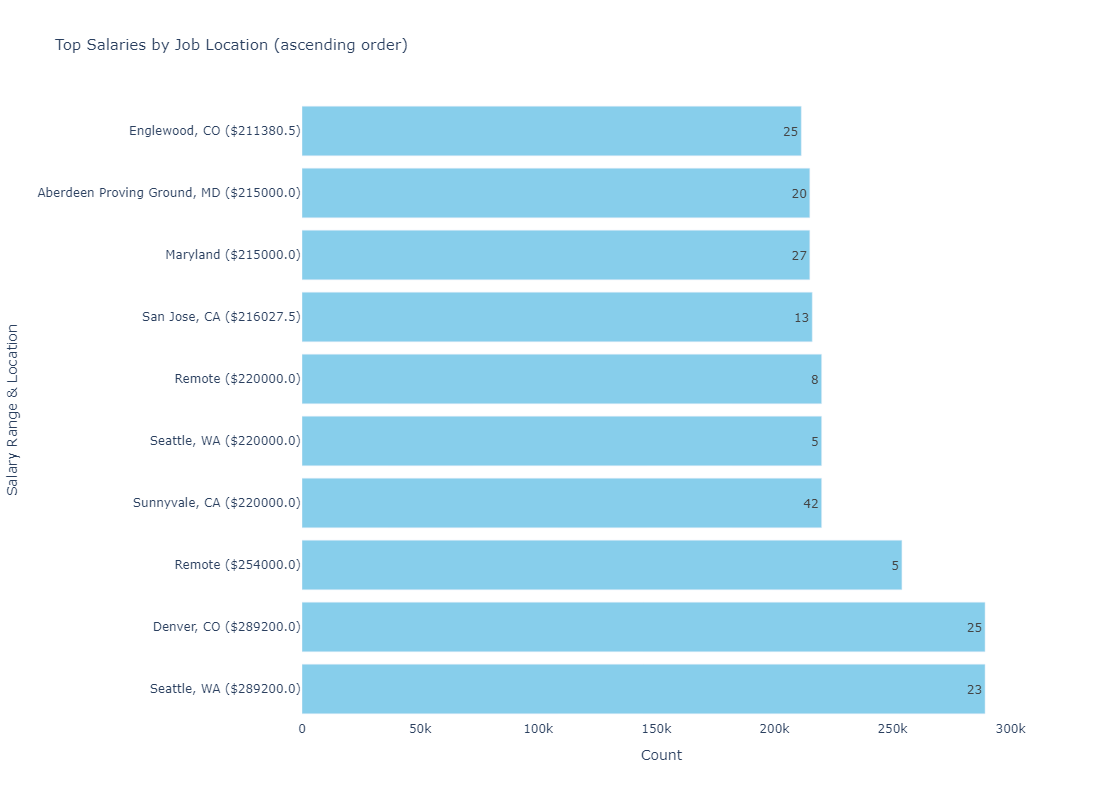

In [206]:
import plotly.graph_objects as go

fig = go.Figure()

top_salary_by_location = filtered_salaries.head(10)

fig.add_trace(go.Bar(
    x=top_salary_by_location['average salary'],
    y=top_salary_by_location['location'] + ' (' + '$' + top_salary_by_location['average salary'].astype(str) + ')',
    orientation = 'h',
    marker_color='skyblue',
    text=top_salaries_by_role['frequency'],  # Adding text labels
    textposition='auto'
))

# Inverting y-axis to display the highest counts at the top
fig.update_layout(
    title='Top Salaries by Job Location (ascending order)',
    xaxis_title='Count',
    yaxis_title='Salary Range & Location',
    plot_bgcolor='white',
    showlegend=False,
    title_font_size=15,
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    height=800,  # Increasing the figure height
    margin=dict(l=300)  # Increasing the left margin
)

# Show the plot
fig.show()


### Which companies are posting the most roles?

In [ ]:
company = [company for company in dataset['company'].unique()]
sorted(company)

In [25]:
len(company)

2918

In [208]:
company_listing_frequency = dataset.groupby(['company']).size().reset_index(name='frequency')
sorted_company_listing_frequency = company_listing_frequency.sort_values(ascending=False, by='frequency')
sorted_company_listing_frequency.head(5)

,company,frequency
1214,Indeed,1166
397,Buddy Web Design & Development,231
2109,Salesforce,165
2610,Underdog.io,106
2520,TikTok,101


### What are the top companies offering remote positions?

In [212]:
# Filter for remote locations
remote_jobs_df = dataset[dataset['location'].str.contains("remote", case=False)]

# Group by company and location, then count the occurrences
companies_offering_remote_roles = remote_jobs_df.groupby(['company', 'location']).size().reset_index(name='frequency')

# Sort by frequency in descending order
sorted_companies_offering_remote_roles = companies_offering_remote_roles.sort_values(ascending=False, by='frequency')

sorted_companies_offering_remote_roles.head(10)

filter_company_remote = sorted_companies_offering_remote_roles[sorted_companies_offering_remote_roles['company'] != 'Indeed']
filter_company_remote.head(10)

,company,location,frequency
37,AlphaPoint,Remote,60
514,"Prime Trust, LLC",Remote,58
519,Project Admission,Remote,56
250,Five Pack Creative,Remote,45
77,BNL Consulting,Remote,39
52,Apruve,Remote,38
173,Curis IT,Remote,35
199,Dojnia Staffing,Remote,33
728,Veeva Systems,Remote,31
466,"Olivine, Inc.",Remote,31


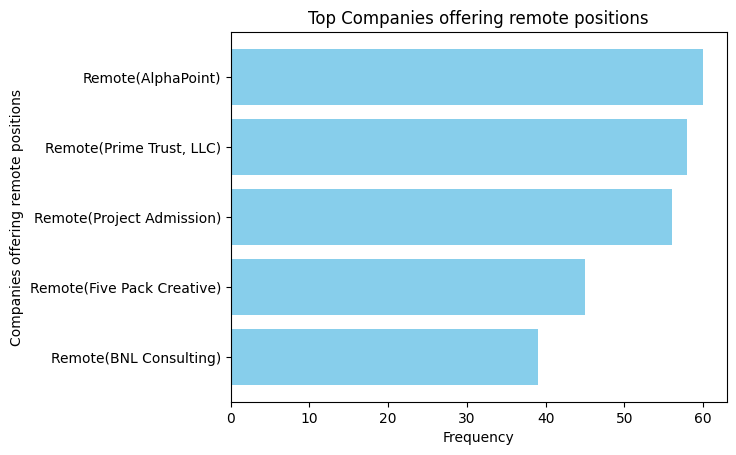

In [213]:
top_companies_offering_remote_roles = filter_company_remote.head()

plt.barh(top_companies_offering_remote_roles['location'] + '(' + top_companies_offering_remote_roles['company'] + ')',
         top_companies_offering_remote_roles['frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Companies offering remote positions')
plt.title('Top Companies offering remote positions')
plt.gca().invert_yaxis()  # Highest frequencies on top
plt.show()

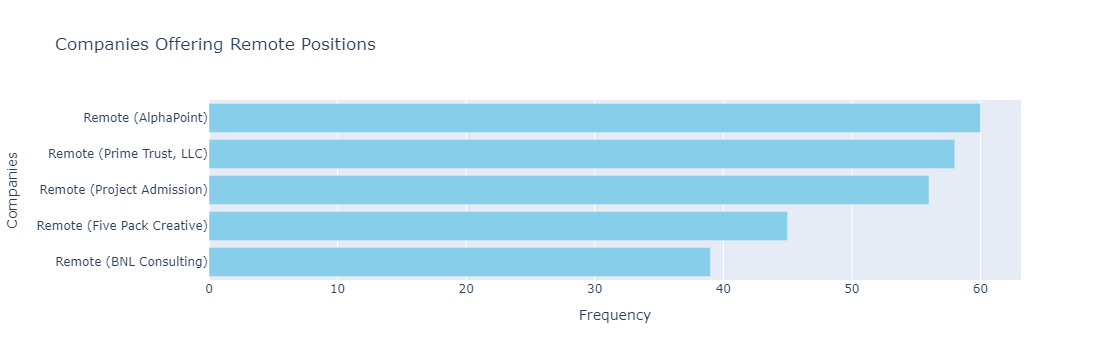

In [215]:
import plotly.graph_objects as go

# Assuming top_companies_offering_remote_roles is a DataFrame
labels = top_companies_offering_remote_roles['location'] + ' (' + top_companies_offering_remote_roles['company'] + ')'
frequencies = top_companies_offering_remote_roles['frequency']

# Create the Plotly figure
fig = go.Figure()

fig.add_trace(go.Bar(
    y=labels,
    x=frequencies,
    orientation='h',  # Horizontal bar chart
    marker=dict(color='skyblue')
))

fig.update_layout(
    title='Companies Offering Remote Positions',
    xaxis_title='Frequency',
    yaxis_title='Companies',
    yaxis=dict(autorange='reversed')  # Highest frequencies on top
)

fig.show()


### Location Analysis: What are the most common locations for software engineering positions


In [217]:
most_common_locations = dataset.groupby(['location']).size().reset_index(name='frequency')

sorted_most_common_locations = most_common_locations.sort_values(by='frequency', ascending=False)
sorted_most_common_locations.head(10)

,location,frequency
731,Remote,3339
53,"Austin, TX",806
803,"Seattle, WA",401
616,"New York, NY",375
781,"San Francisco, CA",290
168,"Chicago, IL",272
43,"Atlanta, GA",269
90,"Boston, MA",253
233,"Denver, CO",224
216,"Dallas, TX",220


### Answer: 
1. Remote,
2. Austin, TX,
3. Seattle, WA,
4. New York, NY,
5. San Francisco, CA

### How does the location impact salary?

In [219]:
locations = [loc for loc in dataset['location'].unique()]

In [225]:
salaries_by_location = dataset.groupby(['average salary', 'location']).size().reset_index(name='frequency')
salaries_by_location

salaries_by_location_sorted = salaries_by_location.sort_values(by='average salary', ascending=False)
salaries_by_location_sorted.head(10)

filtered_salaries = salaries_by_location_sorted[salaries_by_location_sorted['frequency'] > 5]
filtered_salaries.head(10)

,average salary,location,frequency
3831,289200.0,"Seattle, WA",8
3830,289200.0,"Denver, CO",23
3825,254000.0,Remote,29
3816,220000.0,"Sunnyvale, CA",12
3815,220000.0,"Seattle, WA",7
3812,220000.0,Remote,35
3811,216027.5,"San Jose, CA",13
3809,215000.0,Maryland,11
3807,215000.0,"Aberdeen Proving Ground, MD",16
3806,211380.5,"Englewood, CO",20


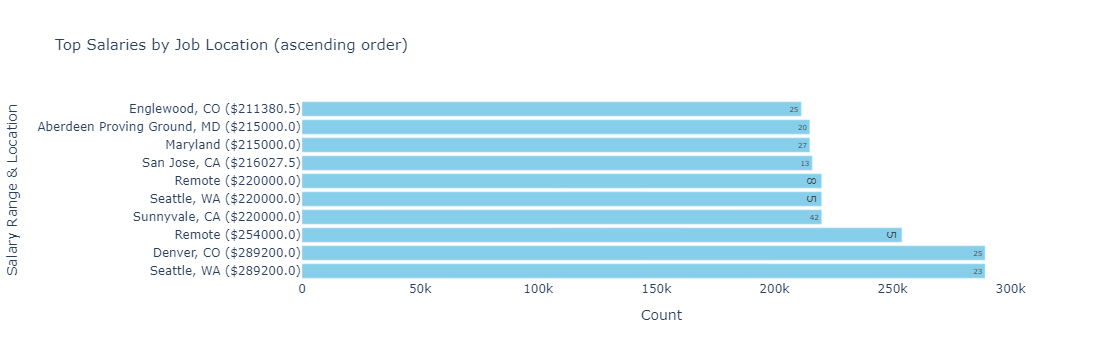

In [226]:
import plotly.graph_objects as go

fig = go.Figure()

top_salary_by_location = filtered_salaries.head(10)

fig.add_trace(go.Bar(
    x=top_salary_by_location['average salary'],
    y=top_salary_by_location['location'] + ' (' + '$' + top_salary_by_location['average salary'].astype(str) + ')',
    orientation = 'h',
    marker_color='skyblue',
    text=top_salaries_by_role['frequency'],  # Adding text labels
    textposition='auto'
))

# Inverting y-axis to display the highest counts at the top
fig.update_layout(
    title='Top Salaries by Job Location (ascending order)',
    xaxis_title='Count',
    yaxis_title='Salary Range & Location',
    plot_bgcolor='white',
    showlegend=False,
    title_font_size=15,
    xaxis_title_font=dict(size=14),
    yaxis_title_font=dict(size=14),
    height=800,  # Increasing the figure height
    margin=dict(l=300)  # Increasing the left margin
)

# Show the plot
fig.show()


### What are the most common locations for software engineering roles?

In [233]:
jobs_by_location = dataset[['title', 'location']].value_counts()
jobs_by_location.head(10)

title                        location    
Senior Software Engineer     Remote          271
Software Engineer            Remote          134
                             Austin, TX       87
                             Seattle, WA      79
Senior Software Engineer     Seattle, WA      70
Principal Software Engineer  Remote           67
Senior Software Engineer     Chicago, IL      66
Site Reliability Engineer    Remote           62
Full Stack Developer         Remote           60
Senior Software Engineer     New York, NY     53
Name: count, dtype: int64

In [234]:
location_job_count = dataset['location'].value_counts().head(10)
location_job_count

location
Remote               3339
Austin, TX            806
Seattle, WA           401
New York, NY          375
San Francisco, CA     290
Chicago, IL           272
Atlanta, GA           269
Boston, MA            253
Denver, CO            224
Dallas, TX            220
Name: count, dtype: int64

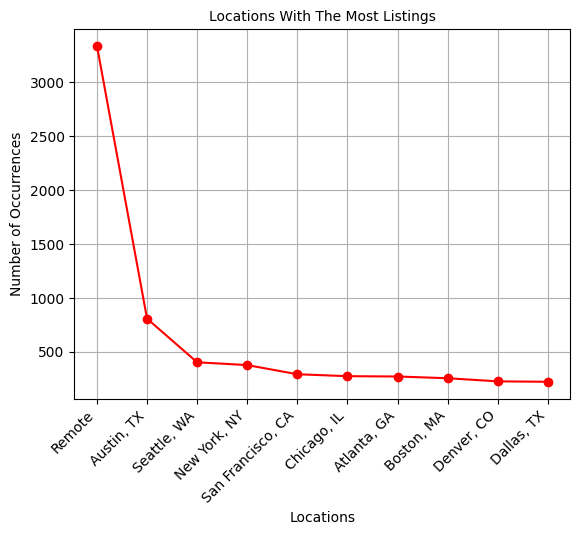

In [235]:
# Plotting the line chart
# plt.figure(figsize=(10, 6))
plt.plot(location_job_count.index, location_job_count.values, marker='o', linestyle='-', color='r')

# Adding titles and labels
plt.title('Locations With The Most Listings', fontsize=10)
plt.xlabel('Locations', fontsize=10)
plt.ylabel('Number of Occurrences', fontsize=10)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.grid(True)

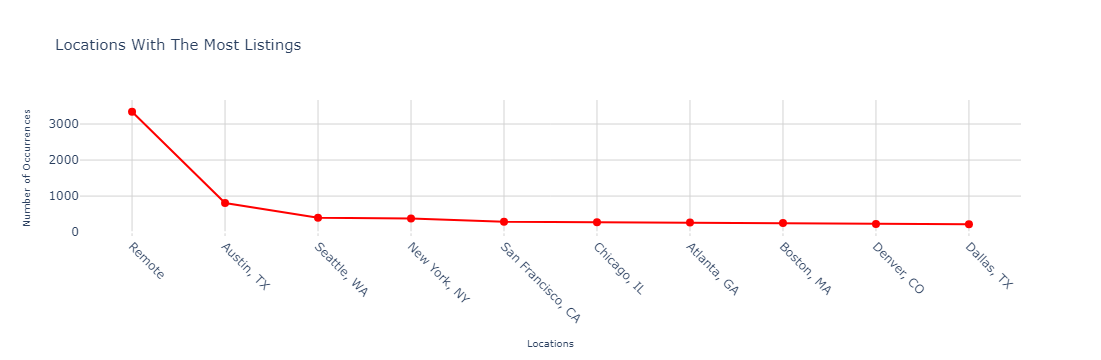

In [236]:
import plotly.graph_objects as go

# Assuming location_job_count is a pandas Series with the locations as the index and their occurrences as the values

fig = go.Figure()

# Plotting the line chart
fig.add_trace(go.Scatter(
    x=location_job_count.index,
    y=location_job_count.values,
    mode='lines+markers',
    line=dict(color='red'),
    marker=dict(color='red', size=8),
))

# Adding titles and labels
fig.update_layout(
    title='Locations With The Most Listings',
    xaxis_title='Locations',
    yaxis_title='Number of Occurrences',
    title_font_size=15,
    xaxis_title_font=dict(size=10),
    yaxis_title_font=dict(size=10),
    xaxis=dict(tickangle=45),
    showlegend=False,
    plot_bgcolor='white'
)

# Adding gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgray')

fig.show()


## **Locations with the most listings**

- Remote - 3339
- Austin, TX - 806
- Seattle, WA - 401
- New York, NY - 375     
- San Francisco, CA - 290